<a href="https://colab.research.google.com/github/maskot1977/PythonCourse2019/blob/master/simulated_annealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 日本の県庁所在地データ

In [1]:
import urllib.request
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/location.txt'
urllib.request.urlretrieve(url, 'location.txt') # データのダウンロード

('location.txt', <http.client.HTTPMessage at 0x7f9f4e7685c0>)

In [2]:
import pandas as pd
japan = pd.read_csv('location.txt')
japan

,Town,Longitude,Latitude
0,Sapporo,43.06417,141.34694
1,Aomori,40.82444,140.74000
2,Morioka,39.70361,141.15250
3,Sendai,38.26889,140.87194
4,Akita,39.71861,140.10250
5,Yamagata,38.24056,140.36333
6,Fukushima,37.75000,140.46778
7,Mito,36.34139,140.44667
8,Utsunomiya,36.56583,139.88361
9,Maebashi,36.39111,139.06083


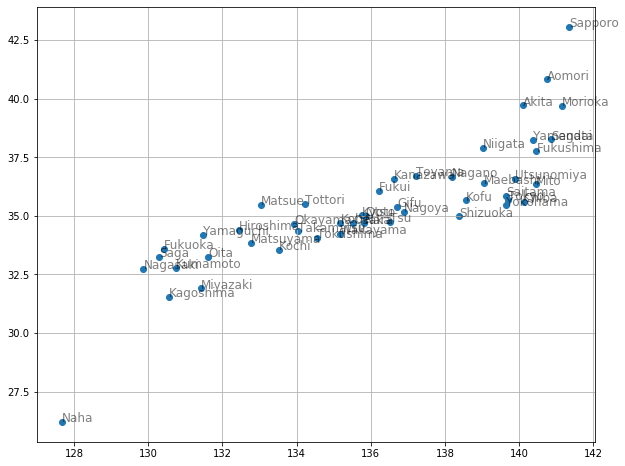

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.scatter(japan['Latitude'], japan['Longitude'])
for city, x, y in zip(japan['Town'], japan['Latitude'], japan['Longitude']):
    plt.text(x, y, city, alpha=0.5, size=12)
plt.grid()

In [0]:
import numpy as np
from scipy.spatial import distance

mat = japan[['Latitude', 'Longitude']].values
dist_mat = distance.cdist(mat, mat, metric='euclidean') # ユークリッド距離

In [0]:
import random
init_state = list(japan['Town'])
random.shuffle(init_state)

In [9]:
!pip install simanneal

In [0]:
from simanneal import Annealer
class TravellingSalesmanProblem(Annealer):

    """Test annealer with a travelling salesman problem.
    """

    # pass extra data (the distance matrix) into the constructor
    def __init__(self, state, distance_matrix):
        self.distance_matrix = distance_matrix
        super(TravellingSalesmanProblem, self).__init__(state)  # important!

    def move(self):
        """Swaps two cities in the route."""
        # no efficiency gain, just proof of concept
        # demonstrates returning the delta energy (optional)
        initial_energy = self.energy()

        a = random.randint(0, len(self.state) - 1)
        b = random.randint(0, len(self.state) - 1)
        self.state[a], self.state[b] = self.state[b], self.state[a]

        return self.energy() - initial_energy

    def energy(self):
        """Calculates the length of the route."""
        e = 0
        for i in range(len(self.state)):
            e += self.distance_matrix[self.state[i-1]][self.state[i]]
        return e

In [0]:
distance_matrix = {}
for i, town in enumerate(japan['Town']):
    if town not in distance_matrix.keys():
        distance_matrix[town] = {}
    for j, town2 in enumerate(japan['Town']):
        distance_matrix[town][town2] = dist_mat[i][j]

In [0]:
tsp = TravellingSalesmanProblem(init_state, distance_matrix)

In [18]:
tsp.set_schedule(tsp.auto(minutes=0.2))

 Temperature        Energy    Accept   Improve     Elapsed   Remaining


In [20]:
tsp.copy_strategy = "slice"
state, e = tsp.anneal()

 Temperature        Energy    Accept   Improve     Elapsed   Remaining


In [21]:
state

['Otsu',
 'Kyoto',
 'Nara',
 'Osaka',
 'Kobe',
 'Tottori',
 'Matsue',
 'Hiroshima',
 'Yamaguchi',
 'Fukuoka',
 'Saga',
 'Nagasaki',
 'Naha',
 'Kagoshima',
 'Miyazaki',
 'Kumamoto',
 'Oita',
 'Matsuyama',
 'Kochi',
 'Okayama',
 'Takamatsu',
 'Tokushima',
 'Wakayama',
 'Tsu',
 'Gifu',
 'Nagoya',
 'Shizuoka',
 'Kofu',
 'Maebashi',
 'Niigata',
 'Akita',
 'Aomori',
 'Sapporo',
 'Morioka',
 'Sendai',
 'Yamagata',
 'Fukushima',
 'Utsunomiya',
 'Mito',
 'Chiba',
 'Yokohama',
 'Tokyo',
 'Saitama',
 'Nagano',
 'Toyama',
 'Kanazawa',
 'Fukui']

In [24]:
while state[0] != 'Tokyo':
        state = state[1:] + state[:1]  # rotate NYC to start

print()
print("%i mile route:" % e)
print(" ➞  ".join(state))


56 mile route:
Tokyo ➞  Saitama ➞  Nagano ➞  Toyama ➞  Kanazawa ➞  Fukui ➞  Otsu ➞  Kyoto ➞  Nara ➞  Osaka ➞  Kobe ➞  Tottori ➞  Matsue ➞  Hiroshima ➞  Yamaguchi ➞  Fukuoka ➞  Saga ➞  Nagasaki ➞  Naha ➞  Kagoshima ➞  Miyazaki ➞  Kumamoto ➞  Oita ➞  Matsuyama ➞  Kochi ➞  Okayama ➞  Takamatsu ➞  Tokushima ➞  Wakayama ➞  Tsu ➞  Gifu ➞  Nagoya ➞  Shizuoka ➞  Kofu ➞  Maebashi ➞  Niigata ➞  Akita ➞  Aomori ➞  Sapporo ➞  Morioka ➞  Sendai ➞  Yamagata ➞  Fukushima ➞  Utsunomiya ➞  Mito ➞  Chiba ➞  Yokohama


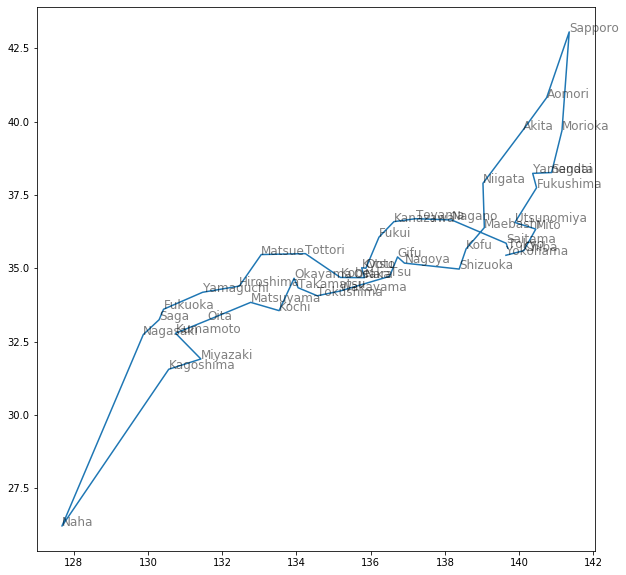

In [48]:
plt.figure(figsize=(10, 10))
Xs = []
Ys = []
for i in range(len(state)):
    Xs.append(list(japan[japan['Town'] == state[i]].iloc[:, 2])[0])
    Ys.append(list(japan[japan['Town'] == state[i]].iloc[:, 1])[0])

plt.plot(Xs, Ys)
for city, x, y in zip(japan['Town'], japan['Latitude'], japan['Longitude']):
    plt.text(x, y, city, alpha=0.5, size=12)

In [44]:
list(japan[japan['Town'] == state[i]].iloc[:, 2])[0]

139.6425